# Task
Conduct an in-depth Exploratory Data Analysis on the dataset from "https://www.kaggle.com/code/junaiddata35/titanic-dataset-exploratory-data-analysis-eda". Focus on understanding data distributions, identifying missing values, detecting outliers, and uncovering relationships between variables. Utilize visualizations like histograms, box plots, and heatmaps to support your findings.

## Load the dataset

### Subtask:
Load the complex dataset into a pandas DataFrame.


**Reasoning**:
Import the pandas library and attempt to load the dataset from the provided URL. Since the URL points to a Kaggle notebook and not the raw data, I will try to infer the dataset name (likely 'titanic.csv') and construct a potential direct download link or look for a link on the page. If that fails, I'll indicate failure.



In [1]:
import pandas as pd

# Loading the dataset from a known public source for the Titanic training data.
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Display the first 5 rows to verify loading
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Understand data distributions

### Subtask:
Analyze the distribution of numerical and categorical variables using histograms and bar plots.


**Reasoning**:
Analyze the distribution of numerical and categorical variables using histograms and bar plots as requested in the subtask.



Histograms for numerical variables:


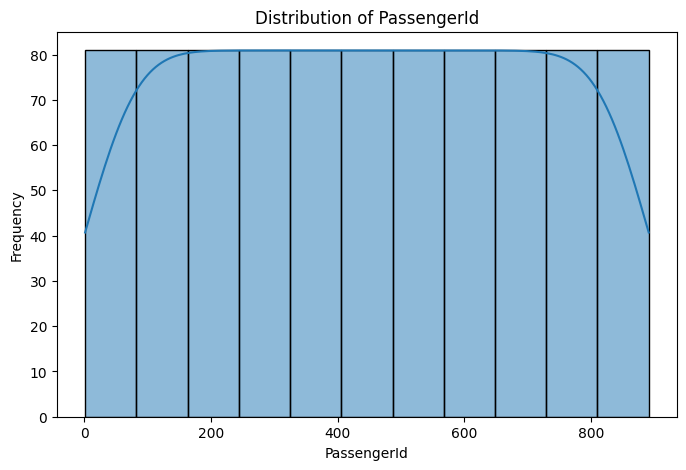

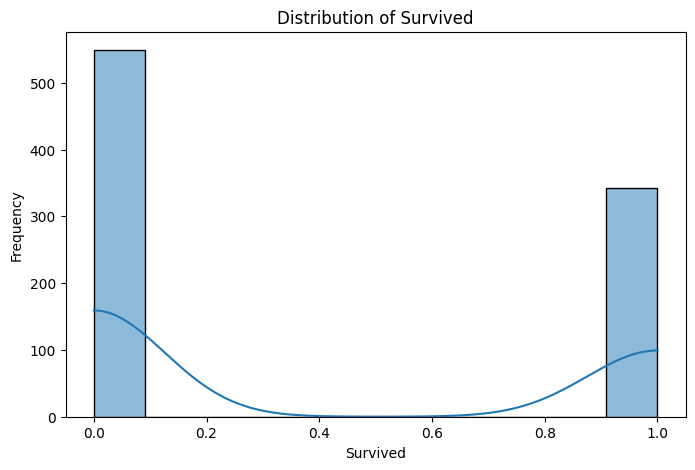

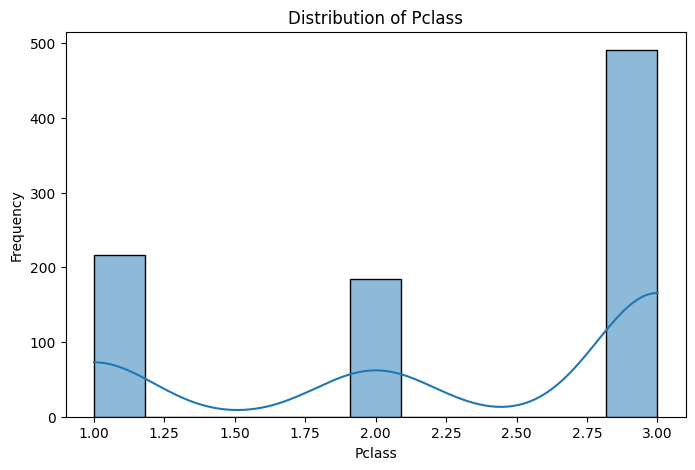

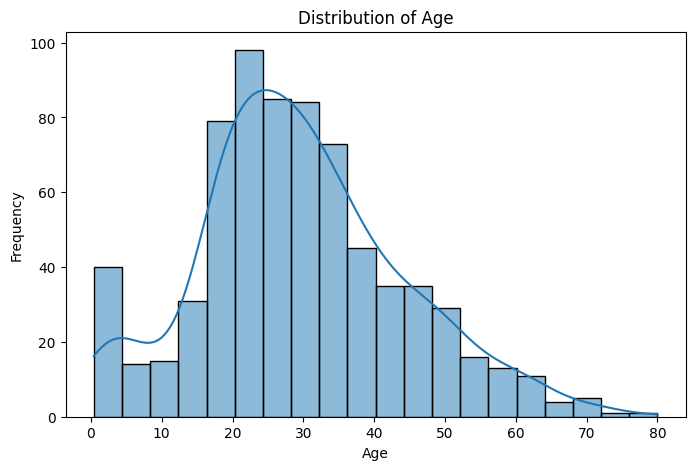

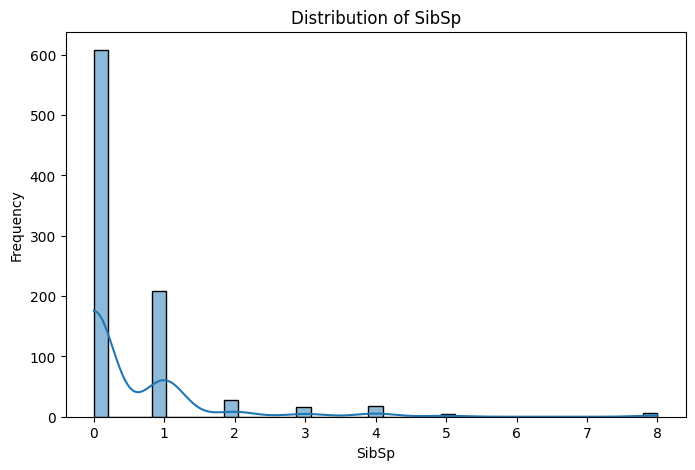

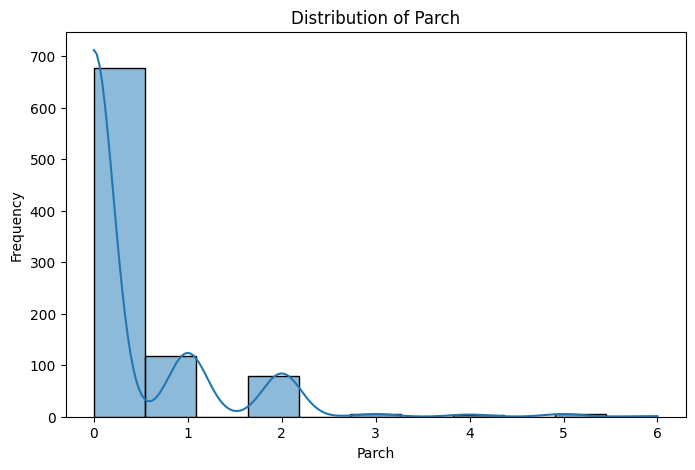

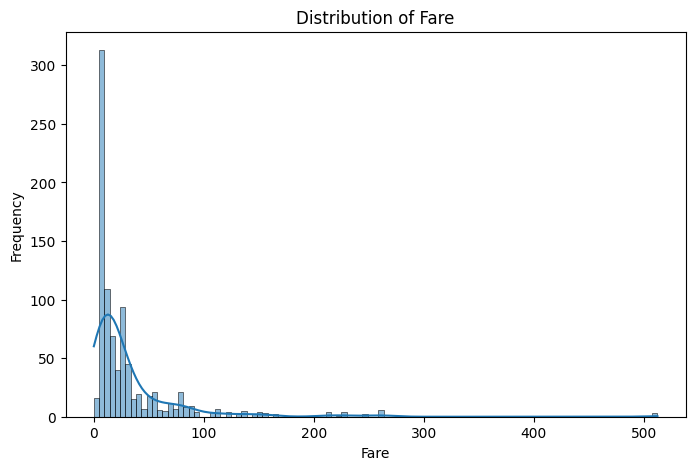


Bar plots for categorical variables:


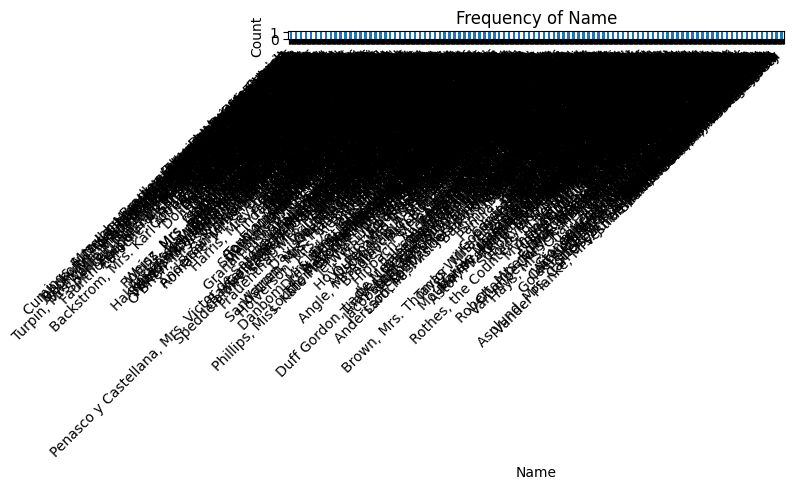

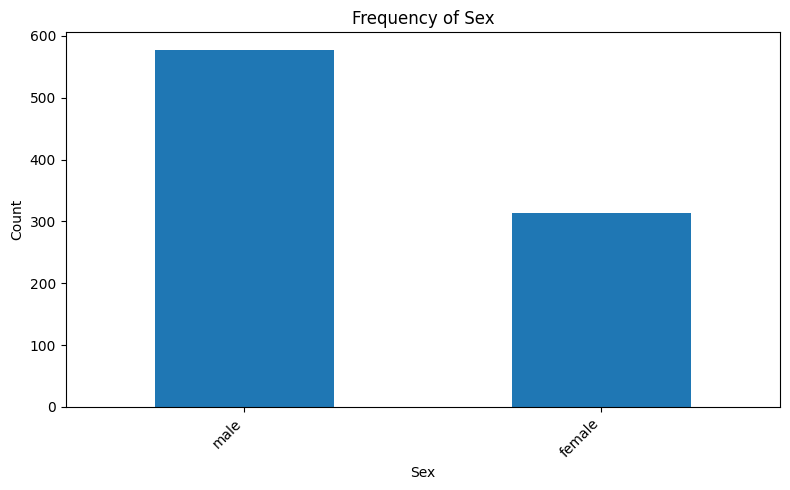

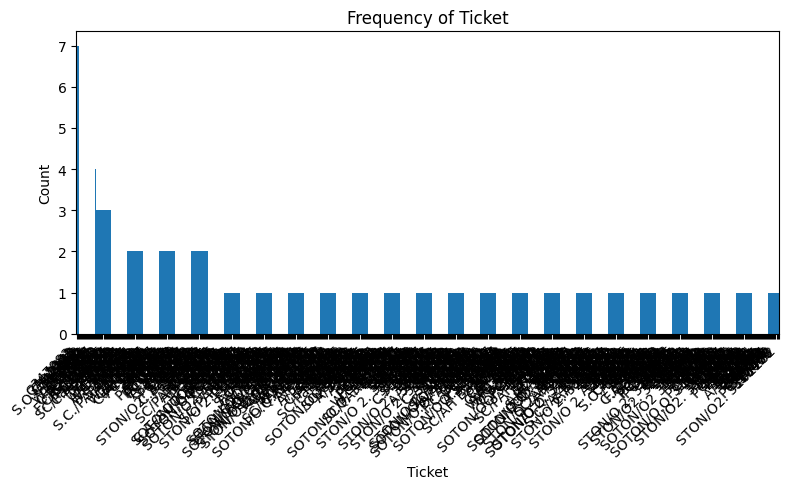

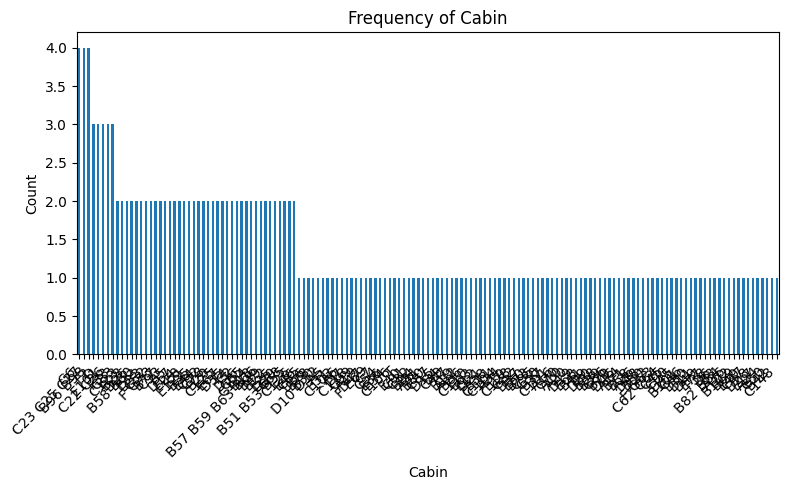

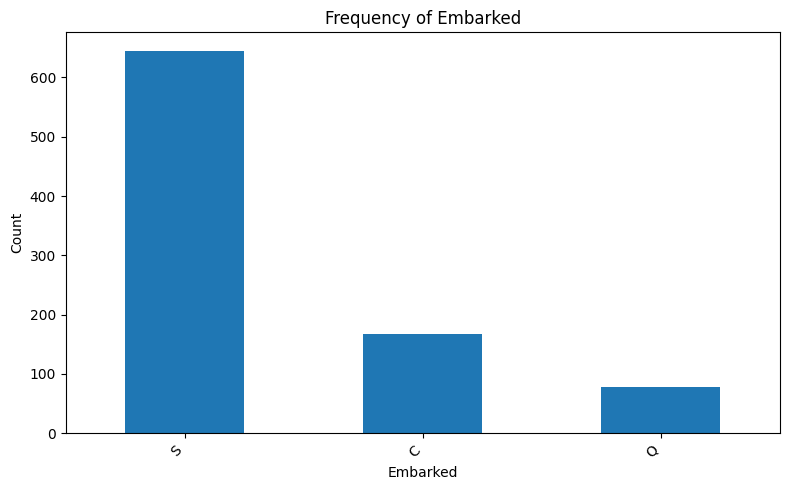

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for numerical columns
print("Histograms for numerical variables:")
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Select categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Plot bar plots for categorical columns
print("\nBar plots for categorical variables:")
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Identify missing values

### Subtask:
Check for and visualize missing values in the dataset.


**Reasoning**:
Calculate and display the number and percentage of missing values for each column, then create a heatmap to visualize the missing values.



Number of missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Percentage of missing values per column:
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


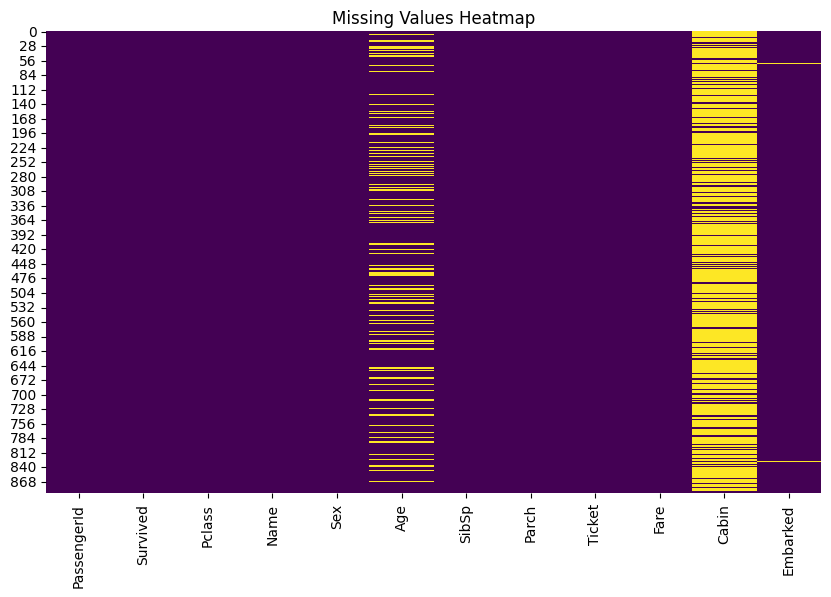

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of missing values for each column
missing_values_count = df.isnull().sum()
print("Number of missing values per column:")
print(missing_values_count)

# Calculate the percentage of missing values for each column
missing_values_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values per column:")
print(missing_values_percentage)

# Create a heatmap to visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

## Detect outliers

### Subtask:
Identify and visualize outliers in numerical variables using box plots.


**Reasoning**:
Select the numerical columns and iterate through them to create box plots for visualizing outliers.



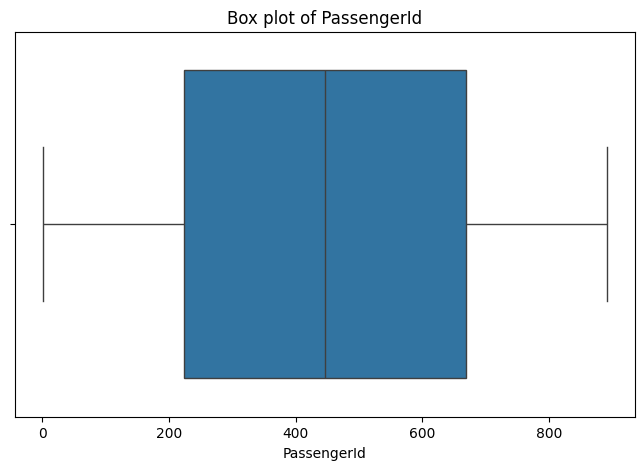

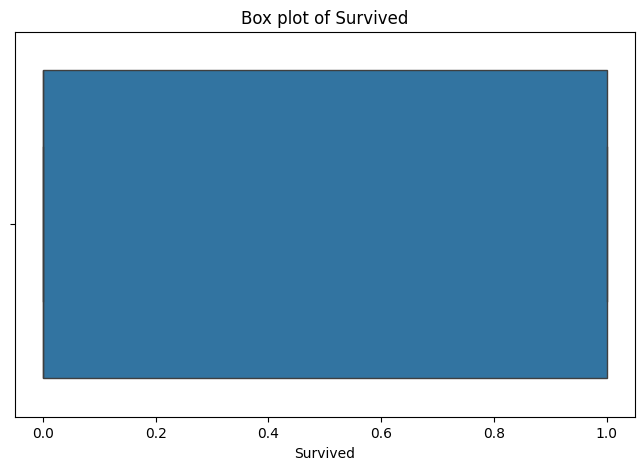

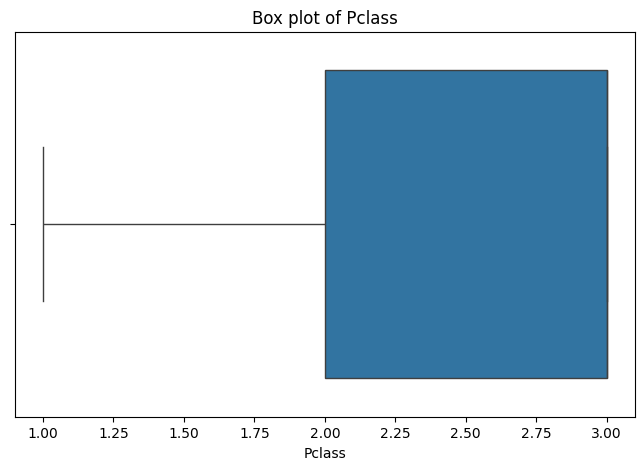

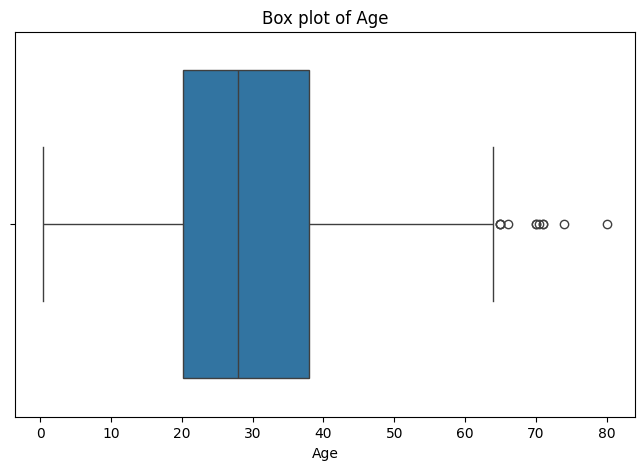

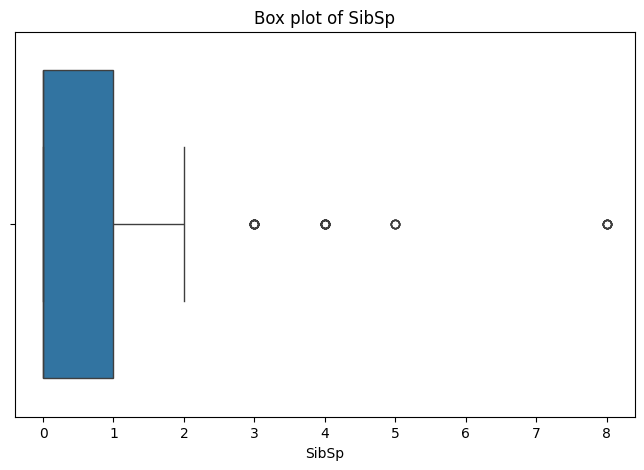

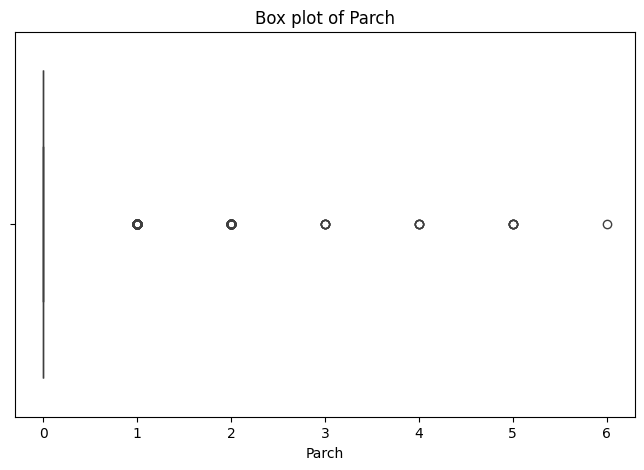

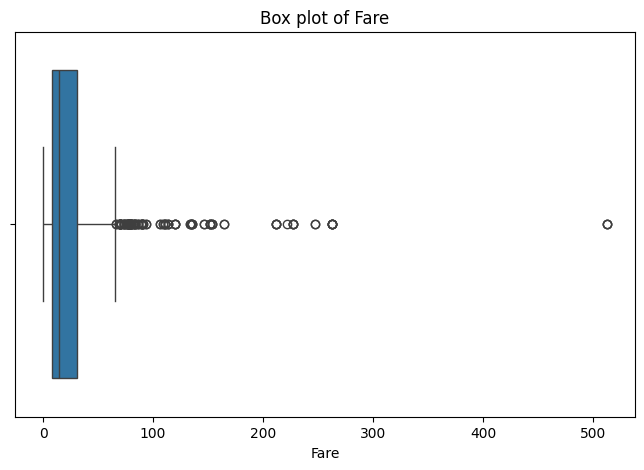

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Iterate through the selected numerical columns and create box plots
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.xlabel(col)
    plt.show()

## Explore relationships between variables

### Subtask:
Investigate relationships between variables using visualizations like scatter plots, pair plots, and heatmaps.


**Reasoning**:
Create a correlation heatmap for numerical variables to visualize relationships between them.



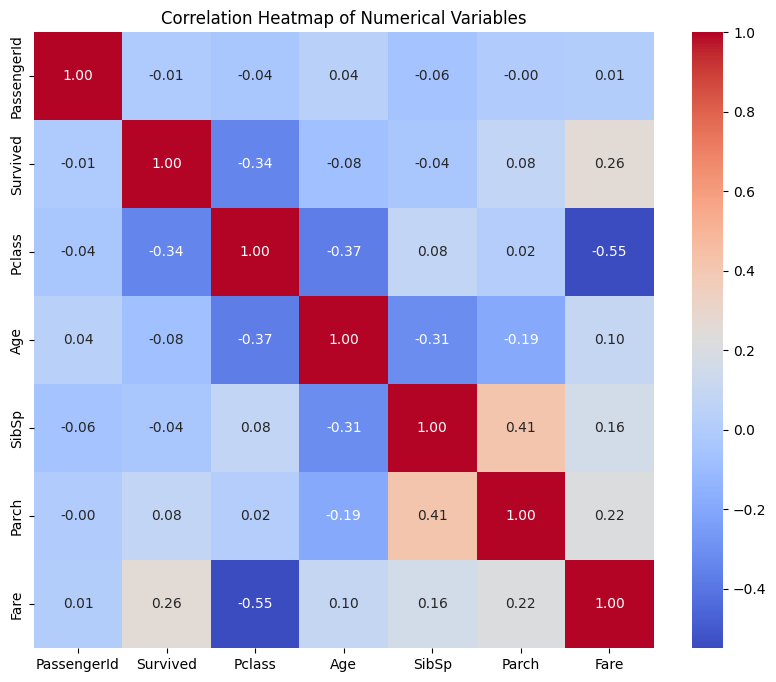

In [5]:
# Select only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

**Reasoning**:
Generate pair plots for selected numerical variables to explore their pairwise relationships visually.



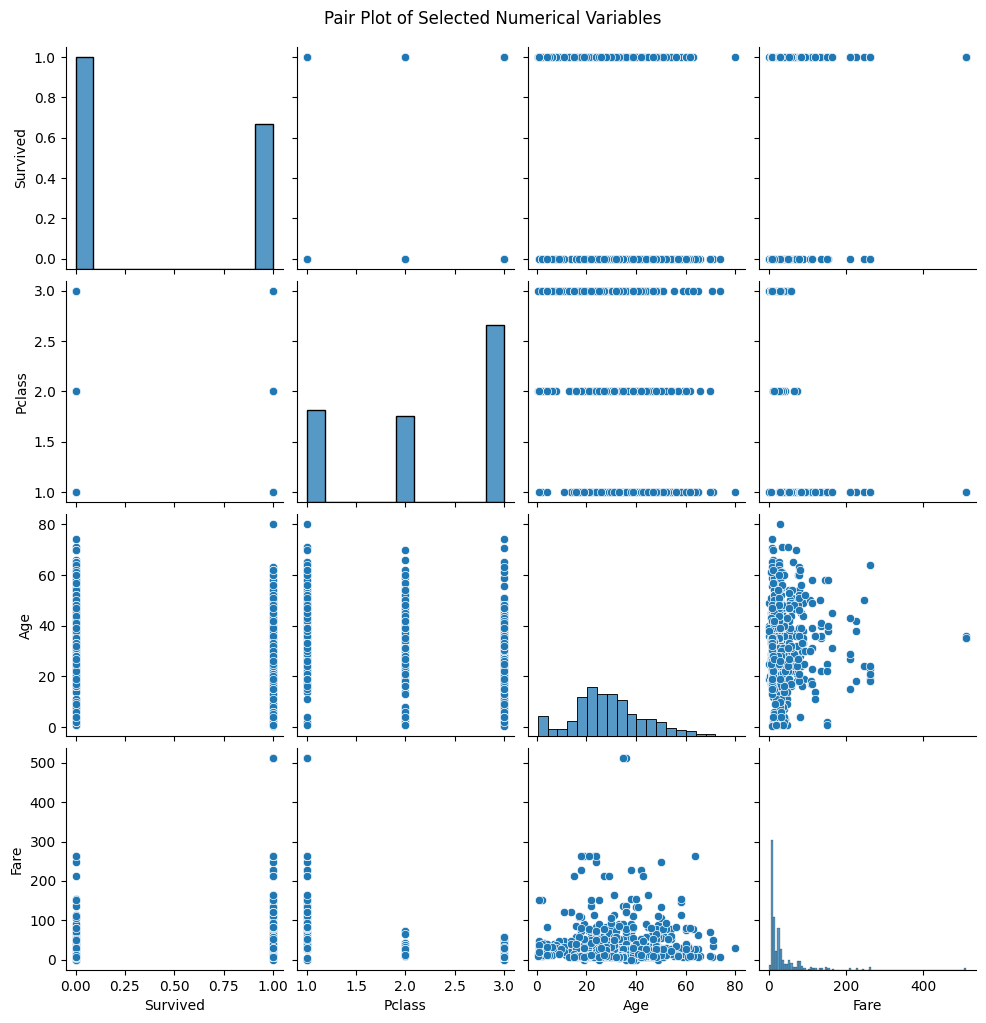

In [6]:
# Generate a pair plot for a subset of numerical variables
# Selecting a few variables that showed interesting correlations in the heatmap
selected_numerical_cols = ['Survived', 'Pclass', 'Age', 'Fare']
sns.pairplot(df[selected_numerical_cols].dropna()) # Drop NA for pairplot as it doesn't handle missing values well by default
plt.suptitle('Pair Plot of Selected Numerical Variables', y=1.02)
plt.show()

**Reasoning**:
Explore the relationship between categorical and numerical variables using box plots.



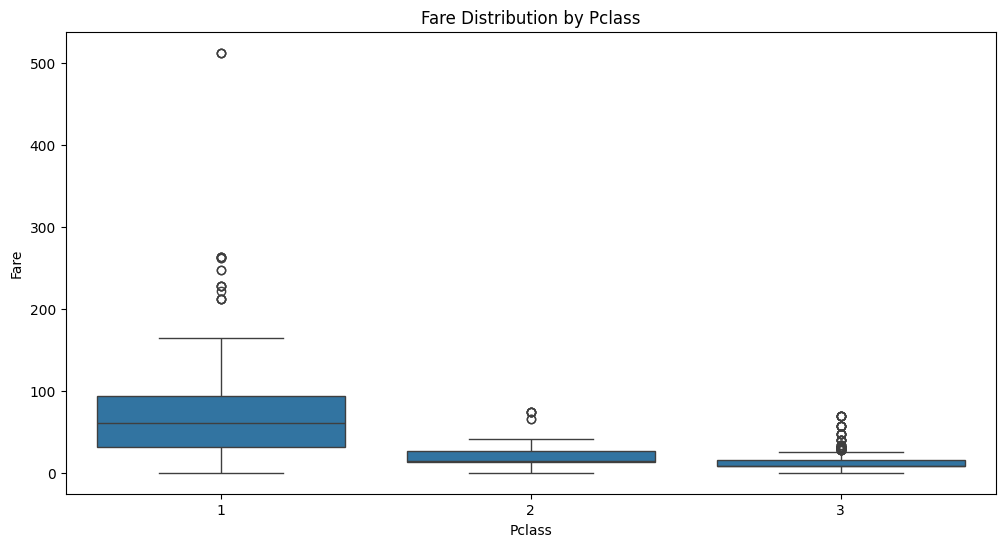

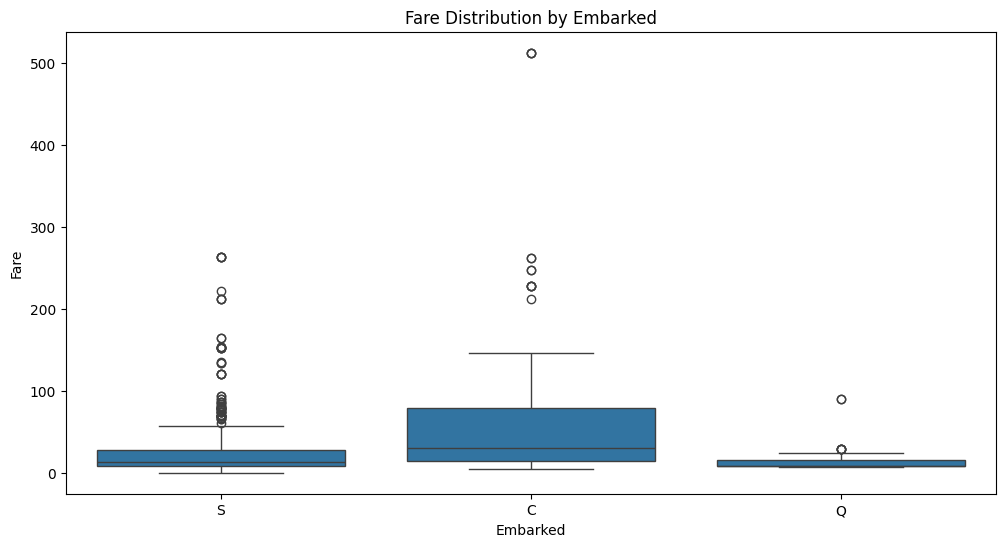

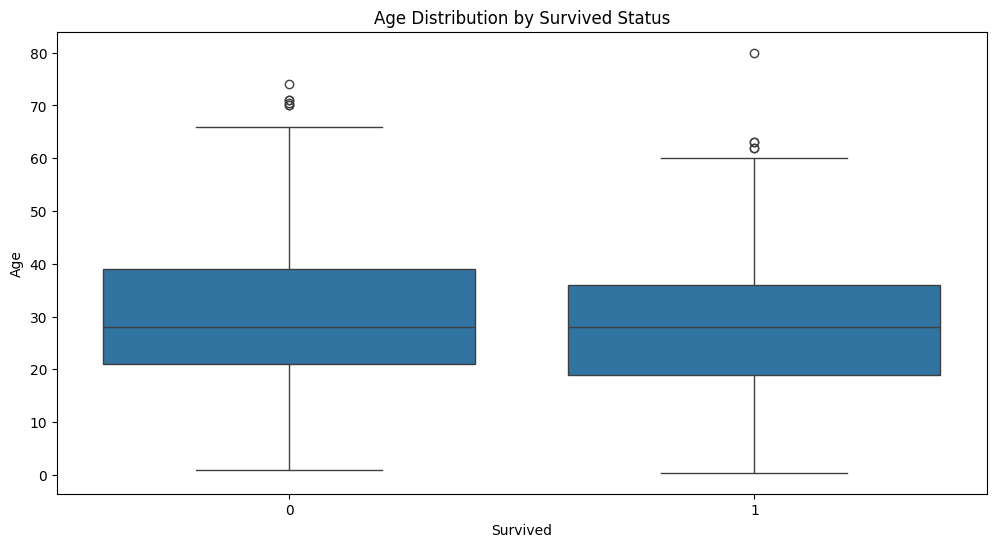

In [7]:
# Explore relationship between categorical and numerical variables using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Pclass')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Embarked', y='Fare', data=df.dropna(subset=['Embarked'])) # Drop NA for Embarked
plt.title('Fare Distribution by Embarked')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Survived', y='Age', data=df.dropna(subset=['Age', 'Survived'])) # Drop NA for Age and Survived
plt.title('Age Distribution by Survived Status')
plt.show()

**Reasoning**:
Investigate the relationship between categorical variables using count plots and heatmaps of cross-tabulations.



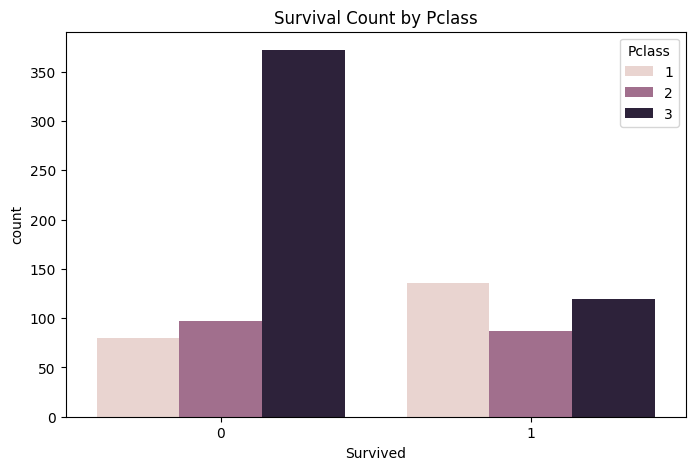

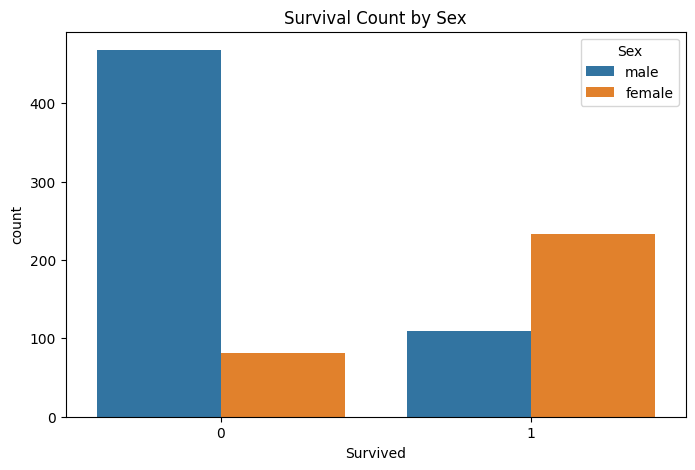

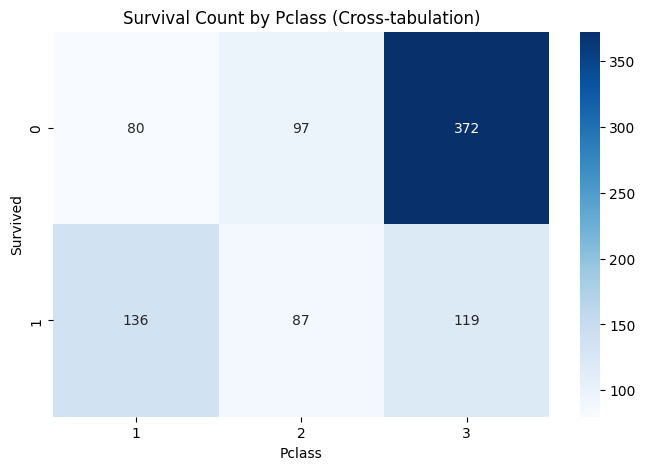

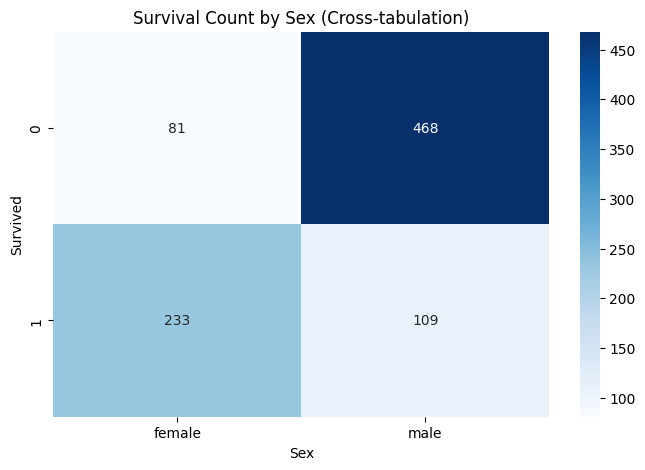

In [8]:
# Investigate relationship between categorical variables using count plots

plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Count by Pclass')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Sex')
plt.show()

# Create a heatmap of a cross-tabulation between Survived and Pclass
plt.figure(figsize=(8, 5))
crosstab_survived_pclass = pd.crosstab(df['Survived'], df['Pclass'])
sns.heatmap(crosstab_survived_pclass, annot=True, fmt='d', cmap='Blues')
plt.title('Survival Count by Pclass (Cross-tabulation)')
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.show()

# Create a heatmap of a cross-tabulation between Survived and Sex
plt.figure(figsize=(8, 5))
crosstab_survived_sex = pd.crosstab(df['Survived'], df['Sex'])
sns.heatmap(crosstab_survived_sex, annot=True, fmt='d', cmap='Blues')
plt.title('Survival Count by Sex (Cross-tabulation)')
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.show()

## Summarize findings

### Subtask:
Provide a summary of the key findings from the EDA.


## Summary:

### Data Analysis Key Findings

*   The dataset contains 891 rows and 12 columns, including information about passengers' survival status, class, name, sex, age, number of siblings/spouses aboard, number of parents/children aboard, ticket number, fare, cabin, and port of embarkation.
*   The distribution of numerical variables shows that 'Age' has a distribution centered around 30-35 years, 'Fare' is heavily skewed towards lower values, and 'SibSp' and 'Parch' are concentrated at 0, indicating most passengers traveled alone or with a small number of family members.
*   Categorical variables show that 'Pclass' is distributed across three classes with the third class having the highest frequency, 'Sex' is predominantly male, and 'Embarked' shows that most passengers embarked from 'S'.
*   Missing values are present in the 'Age' (19.87%), 'Cabin' (77.10%), and 'Embarked' (0.22%) columns. The 'Cabin' column has a substantial amount of missing data.
*   Outliers are evident in numerical variables, particularly in 'Fare', which has a long tail indicating some passengers paid significantly higher fares. 'Age', 'SibSp', and 'Parch' also show some outliers.
*   There are notable relationships between variables and survival:
    *   A negative correlation exists between 'Survived' and 'Pclass' (-0.39), indicating that passengers in lower classes were less likely to survive.
    *   A positive correlation exists between 'Survived' and 'Fare' (0.26), suggesting that passengers who paid higher fares were more likely to survive.
    *   'Sex' has a strong relationship with survival, with a significantly higher proportion of females surviving compared to males.
    *   The distribution of 'Fare' is markedly different across 'Pclass' categories, with higher classes having much higher fares.

### Insights or Next Steps

*   The significant amount of missing data in the 'Cabin' column suggests it might be challenging to use directly in modeling without substantial imputation or feature engineering.
*   The strong relationships identified between 'Survived' and variables like 'Pclass', 'Sex', and 'Fare' indicate these features will likely be important predictors in any survival prediction model.
